**FDI Analytics**

---




**Problem Statement:**


Investment is a game of understanding historic data of investment objects under
different events but it is still a game of chances to minimize the risk we apply analytics
to find the equilibrium investment.
To understand the Foreign direct investment in India for the last 17 years from 2000-01
to 2016-17. This dataset contains sector and financial year-wise data of FDI in India
Sector-wise investment analysis Year-wise investment analysis.
Find key metrics and factors and show the meaningful relationships between
attributes. Do your own research and come up with your findings

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import re

In [ ]:
data = pd.read_csv("/content/FDI data.csv")  #,index_col='Sector')

In [ ]:
data.head()

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98
3,NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57
4,COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00


In [ ]:
data.columns

Index(['Sector', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17'],
      dtype='object')

In [ ]:
years = ['2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016']

In [ ]:
data.columns= ['Sector']+years

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sector  63 non-null     object 
 1   2000    63 non-null     float64
 2   2001    63 non-null     float64
 3   2002    63 non-null     float64
 4   2003    63 non-null     float64
 5   2004    63 non-null     float64
 6   2005    63 non-null     float64
 7   2006    63 non-null     float64
 8   2007    63 non-null     float64
 9   2008    63 non-null     float64
 10  2009    63 non-null     float64
 11  2010    63 non-null     float64
 12  2011    63 non-null     float64
 13  2012    63 non-null     float64
 14  2013    63 non-null     float64
 15  2014    63 non-null     float64
 16  2015    63 non-null     float64
 17  2016    63 non-null     float64
dtypes: float64(17), object(1)
memory usage: 9.0+ KB


In [ ]:
print(data.nunique())

Sector    63
2000      41
2001      46
2002      51
2003      53
2004      58
2005      57
2006      56
2007      61
2008      59
2009      59
2010      61
2011      60
2012      59
2013      61
2014      62
2015      59
2016      58
dtype: int64


In [ ]:
data.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,37.757302,63.931587,42.925714,34.727778,51.090317,87.932540,198.281905,390.085714,498.348571,410.069524,339.413810,557.472698,355.930000,385.703492,490.959841,634.936349,690.131111
std,112.227860,157.878737,86.606439,67.653735,101.934873,206.436967,686.783115,1026.249935,1134.649040,926.814626,627.141139,1031.474056,778.091368,658.429944,837.787060,1335.307706,1411.965354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.200000,0.215000,0.715000,1.230000,4.160000,9.950000,11.950000,7.880000,8.430000,22.720000,15.115000,16.610000,33.800000,30.000000,19.905000
50%,4.030000,5.070000,11.010000,6.370000,9.090000,22.620000,25.820000,58.820000,84.880000,69.740000,58.070000,129.360000,95.410000,113.780000,177.220000,159.130000,110.860000
75%,23.510000,44.830000,36.555000,38.660000,43.205000,63.855000,108.325000,279.270000,383.320000,341.595000,304.280000,593.525000,288.025000,473.060000,595.390000,519.070000,741.220000
max,832.070000,873.230000,419.960000,368.320000,527.900000,1359.970000,4713.780000,6986.170000,6183.490000,5466.130000,3296.090000,5215.980000,4832.980000,3982.890000,4443.260000,6889.460000,8684.070000


In [ ]:
data['Sector_total'] = data[years].sum(axis=1)
data.head()

,Sector,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Sector_total
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18,10330.54
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75,2271.83
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98,11589.13
3,NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57,5181.49
4,COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00,27.74


In [ ]:
annual_fdi = (data.loc[0 : ].sum(axis = 0))
annual_fdi

Sector          METALLURGICAL INDUSTRIESMININGPOWERNON-CONVENT...
2000                                                      2378.71
2001                                                      4027.69
2002                                                      2704.32
2003                                                      2187.85
2004                                                      3218.69
2005                                                      5539.75
2006                                                     12491.76
2007                                                      24575.4
2008                                                     31395.96
2009                                                     25834.38
2010                                                     21383.07
2011                                                     35120.78
2012                                                     22423.59
2013                                                     24299.32
2014      

In [ ]:
data = data.append(annual_fdi, ignore_index=True)

In [ ]:
data = data.replace({data.iloc[-1][0]: 'Annual_total'})

In [ ]:
data

,Sector,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Sector_total
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18,10330.54
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75,2271.83
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98,11589.13
3,NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57,5181.49
4,COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00,27.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,COIR,0.00,0.00,0.00,0.00,0.47,0.59,0.04,0.01,0.00,0.25,0.10,0.55,0.15,0.54,1.36,0.00,0.00,4.06
60,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,0.00,0.00,0.00,0.00,0.00,0.93,64.06,182.92,172.70,324.56,675.07,386.28,283.89,485.37,870.25,4510.71,1860.73,9817.47
61,"CONSTRUCTION DEVELOPMENT: Townships, housing, ...",24.33,51.75,36.10,47.04,152.06,228.71,1392.95,3887.33,4657.51,5466.13,1663.03,3140.78,1332.49,1226.05,769.14,112.55,105.14,24293.09
62,MISCELLANEOUS INDUSTRIES,832.07,221.37,218.76,235.48,121.83,164.76,304.87,528.42,1549.70,1147.56,1475.97,813.38,229.49,468.74,765.88,668.77,296.40,10043.45


In [ ]:
def f(x, y, n):
    if x:return ((y/x)**(1/n))-1
    else: return np.nan
y_start = 2012
y_end = 2016
data['Cagr'] = data[['Sector',str(y_start),str(y_end)]].apply(lambda x: f(x[str(y_start)],x[str(y_end)], y_end-y_start), axis=1)

In [ ]:
data[['Sector','Cagr']].sort_values(by='Cagr',ascending=False)

,Sector,Cagr
45,CEMENT AND GYPSUM PRODUCTS,2.621761
34,PAPER AND PULP (INCLUDING PAPER PRODUCTS),1.496162
54,RETAIL TRADING,1.120337
11,TELECOMMUNICATIONS,1.068563
8,ELECTRICAL EQUIPMENTS,0.837037
...,...,...
4,COAL PRODUCTION,NaN
16,PORTS,NaN
30,PHOTOGRAPHIC RAW FILM AND PAPER,NaN
31,DYE-STUFFS,NaN


In [ ]:
# data['Sector'] = data['Sector'].replace(" \(.*\):","")

In [ ]:
data1 = data.dropna()

In [ ]:
a = data.iloc[-1:,1:-2]
a = a.T
b = a.values.flatten()
c = a.index

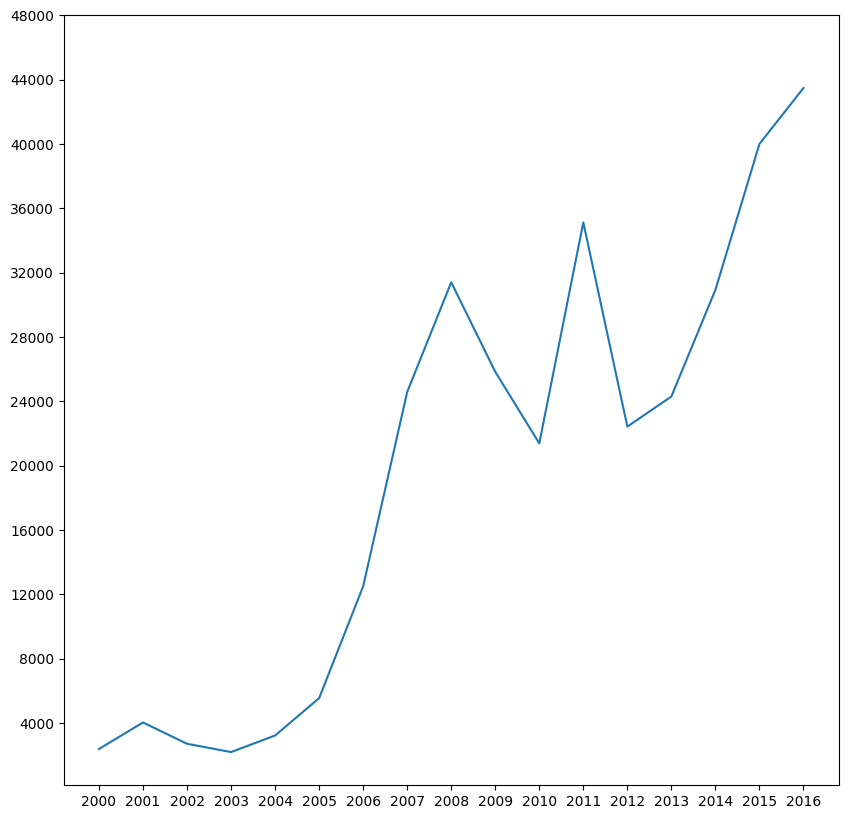

In [ ]:
plt.figure(figsize=(10, 10))
sns.lineplot(x=c, y=b, markers=True)
plt.yticks([4000,8000,12000,16000,20000,24000,28000,32000,36000,40000,44000,48000])
plt.xlabel ="Year"
plt.ylabel = "Annual FDI"
plt.title ='Year Vs Annual FDI'

plt.show()

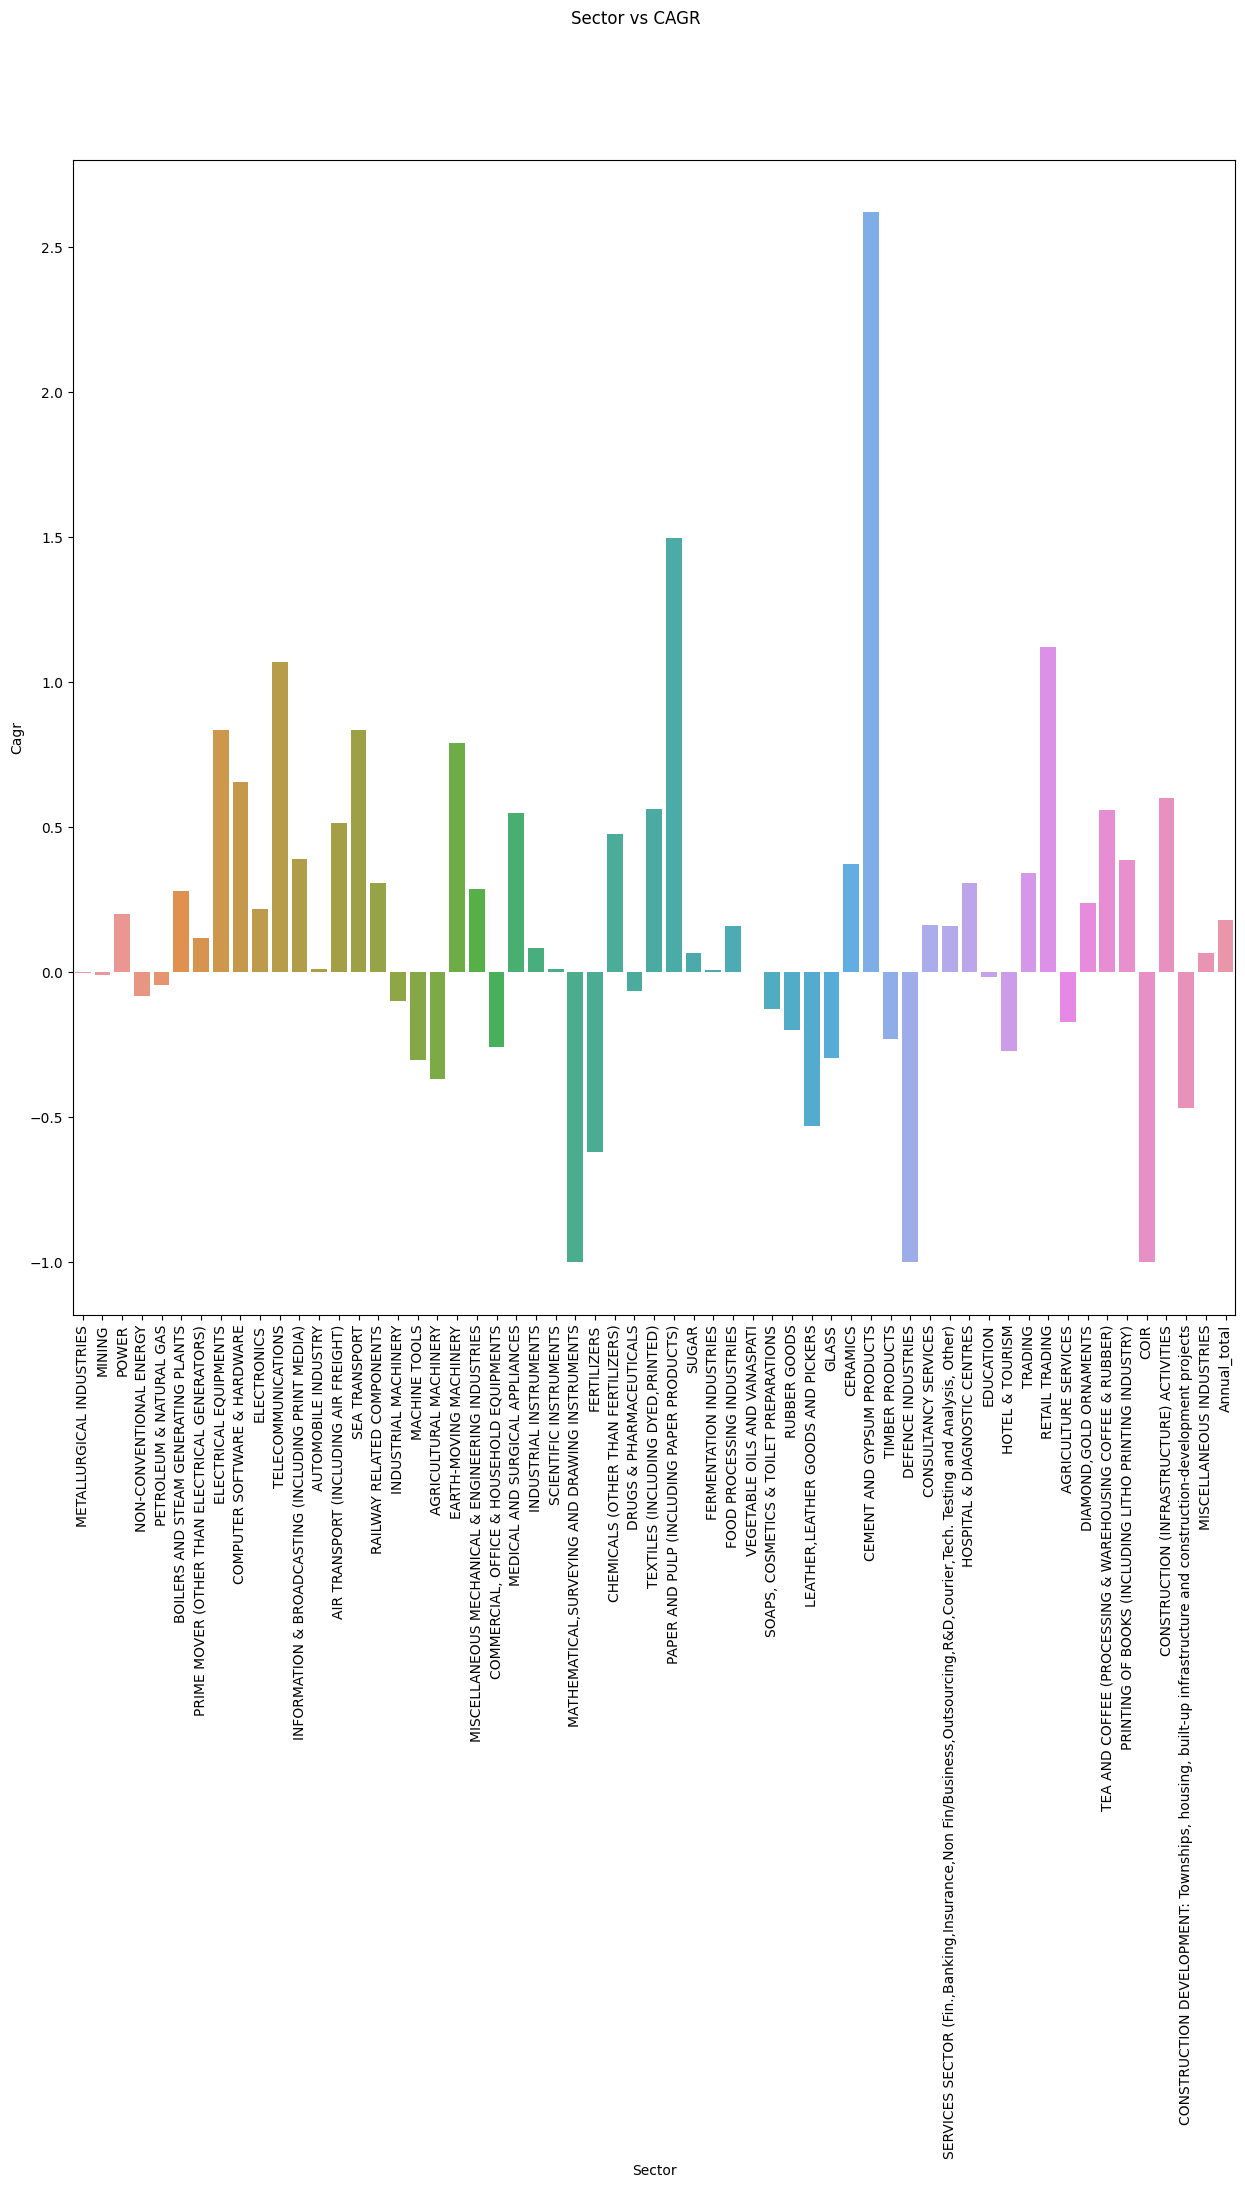

In [ ]:
plt.figure(figsize=(15, 15))
sns.barplot(x = data1['Sector'], y = data1['Cagr'])
plt.xticks(rotation=90)
plt.suptitle("Sector vs CAGR")
plt.show()

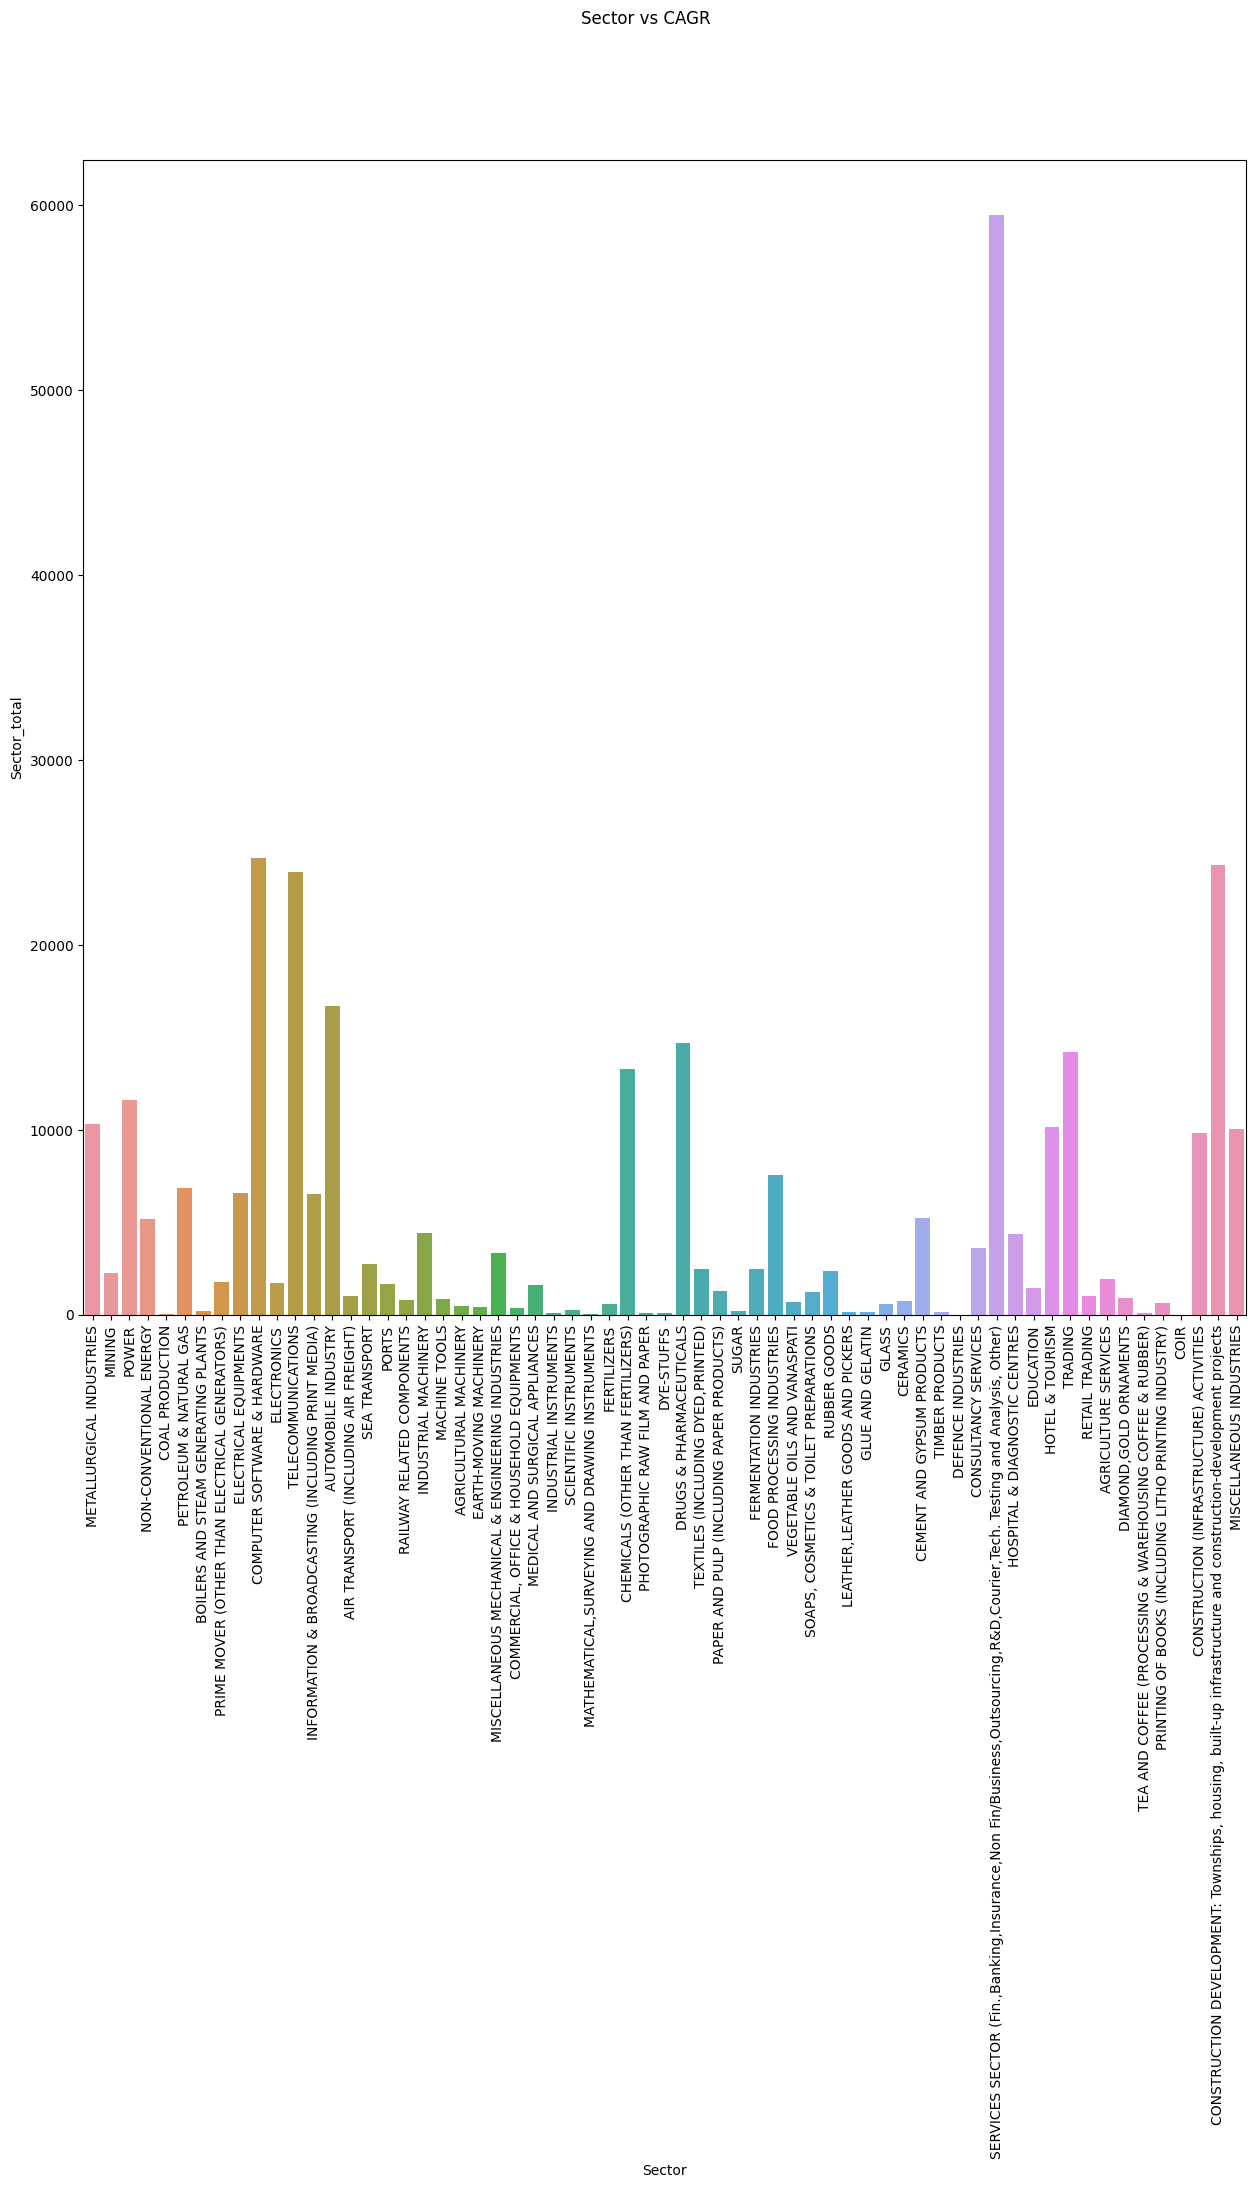

In [ ]:
plt.figure(figsize=(15, 15))
sns.barplot(x = data['Sector'][:-1], y = data['Sector_total'][:-1])
plt.xticks(rotation=90)
plt.suptitle("Sector vs CAGR")
plt.show()

In [ ]:
# data.to_csv("/content/FDI data_1.csv")

In [ ]:
# data1.to_csv("/content/FDI data_2.csv")

In [ ]:
# final = {'Year': years,

#         'Annual Total': a.values.flatten()}

In [ ]:
# q = pd.DataFrame(final)

In [ ]:
# q

In [ ]:
# q.to_csv("/content/FDI data_3.csv")